# Gas Usage vs Temperature

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np



# data

In [4]:
df = pd.read_excel('../data/gas_used.xlsx')
print(df.shape)
df.head()

(7, 6)


,invoice number,transaction date,cost,gal,Environmental Compliance Fee,cost per gal
0,NaN,NaT,NaN,NaN,NaN,NaN
1,NaN,NaT,NaN,NaN,NaN,NaN
2,676952.0,2020-10-02,117.04,55.3,6.99,1.99
3,681181.0,2020-11-25,320.20,103.5,6.99,NaN
4,685620.0,2020-12-26,205.99,100.0,6.99,1.99


In [5]:
df_ = pd.read_csv('../data/2469458.csv')
print(df_.shape)
df_.sample(3)

(2604, 13)


,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESD,WESF
744,US1NYUL0032,"ESOPUS 0.8 NNE, NY US",2021-02-06,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
858,US1NYUL0023,"WEST HURLEY 0.1 S, NY US",2020-08-01,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1679,US1NYUL0016,"ROSENDALE VILLAGE 1.8 WNW, NY US",2020-10-31,NaN,NaN,0.1,0.3,0.0,NaN,NaN,NaN,NaN,NaN


In [6]:
_df = pd.read_csv('../data/2469673.csv')
print(_df.shape)
_df.sample(3)

(2604, 26)


,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,DAPR_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,...,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TOBS,TOBS_ATTRIBUTES,WESD,WESD_ATTRIBUTES,WESF,WESF_ATTRIBUTES
817,US1NYUL0022,"KINGSTON 2.1 N, NY US",41.961037,-73.995767,55.8,2020-10-10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1860,USC00306570,"PHONECIA 2 SW, NY US",42.067400,-74.335600,323.1,2020-10-08,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
855,US1NYUL0022,"KINGSTON 2.1 N, NY US",41.961037,-73.995767,55.8,2021-02-02,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.3,",,N",1.3,",,N"


In [7]:
_df_ = pd.read_csv('../data/2469671.csv')
print(_df_.shape)
_df_.sample(3)

(553, 20)


,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,DAPR_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,WESD,WESD_ATTRIBUTES,WESF,WESF_ATTRIBUTES
505,US1NYUL0029,"HIGHLAND 0.2 SW, NY US",41.714862,-73.968399,116.7,2021-01-03,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",0.0,",,N",0.0,",,N",0.0,",,N"
397,US1NYUL0026,"GARDINER 1.3 WNW, NY US",41.685850,-74.173692,68.6,2021-01-04,NaN,NaN,NaN,NaN,0.22,",,N",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,US1NYUL0019,"WOODSTOCK 0.8 ENE, NY US",42.040970,-74.095882,150.9,2021-01-15,NaN,NaN,NaN,NaN,0.02,",,N",0.0,"T,,N",NaN,NaN,NaN,NaN,NaN,NaN


# EDA
<hr />

Clean data - gas_used.xls

Numpy - paying with pandas -> numpy 

In [8]:
# DataFrame.to_numpy(dtype=None, copy=False, na_value=<object object>)[source]
# view pandas as numpy

print(type(df.to_numpy))
print()
df.to_numpy()

<class 'method'>



array([[nan, NaT, nan, nan, nan, nan],
       [nan, NaT, nan, nan, nan, nan],
       [676952.0, Timestamp('2020-10-02 00:00:00'), 117.04, 55.3, 6.99,
        1.99],
       [681181.0, Timestamp('2020-11-25 00:00:00'), 320.2, 103.5, 6.99,
        nan],
       [685620.0, Timestamp('2020-12-26 00:00:00'), 205.99, 100.0, 6.99,
        1.99],
       [688270.0, Timestamp('2021-01-20 00:00:00'), 224.7, 109.4, 6.99,
        1.99],
       [692265.0, Timestamp('2021-02-17 00:00:00'), 205.99, 100.0, 6.99,
        1.99]], dtype=object)

In [9]:
# drop rows with nans - look but not update

df.drop([0,1])

,invoice number,transaction date,cost,gal,Environmental Compliance Fee,cost per gal
2,676952.0,2020-10-02,117.04,55.3,6.99,1.99
3,681181.0,2020-11-25,320.20,103.5,6.99,NaN
4,685620.0,2020-12-26,205.99,100.0,6.99,1.99
5,688270.0,2021-01-20,224.70,109.4,6.99,1.99
6,692265.0,2021-02-17,205.99,100.0,6.99,1.99


In [10]:
# delete rows with numpy 

"""
??special handling of scalars??
What is def of scalars and how can they be specially be handled. 
"""

#created numpy array 
x = df.to_numpy()

print(type(x))

## numpy.delete(arr, obj, axis=None)
np.delete(x, [0,1],0)

<class 'numpy.ndarray'>


array([[676952.0, Timestamp('2020-10-02 00:00:00'), 117.04, 55.3, 6.99,
        1.99],
       [681181.0, Timestamp('2020-11-25 00:00:00'), 320.2, 103.5, 6.99,
        nan],
       [685620.0, Timestamp('2020-12-26 00:00:00'), 205.99, 100.0, 6.99,
        1.99],
       [688270.0, Timestamp('2021-01-20 00:00:00'), 224.7, 109.4, 6.99,
        1.99],
       [692265.0, Timestamp('2021-02-17 00:00:00'), 205.99, 100.0, 6.99,
        1.99]], dtype=object)

    practice numpy 


In [11]:
# drop the nan rows and redefine the dataframe

df = df.drop([0,1])
df.head()

,invoice number,transaction date,cost,gal,Environmental Compliance Fee,cost per gal
2,676952.0,2020-10-02,117.04,55.3,6.99,1.99
3,681181.0,2020-11-25,320.20,103.5,6.99,NaN
4,685620.0,2020-12-26,205.99,100.0,6.99,1.99
5,688270.0,2021-01-20,224.70,109.4,6.99,1.99
6,692265.0,2021-02-17,205.99,100.0,6.99,1.99


In [12]:
print(type(df['transaction date']))
print()
df['transaction date']

<class 'pandas.core.series.Series'>



2   2020-10-02
3   2020-11-25
4   2020-12-26
5   2021-01-20
6   2021-02-17
Name: transaction date, dtype: datetime64[ns]

In [ ]:
# reset index 


In [ ]:
# convert transaction date to timestamp


In [63]:
#  issue why is this not working ?

df.loc['gal']

KeyError: 'gal'

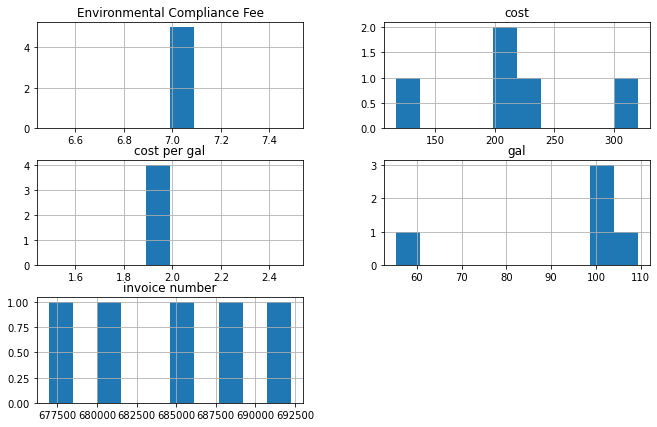

In [15]:
#

df.hist(figsize = (11,7));

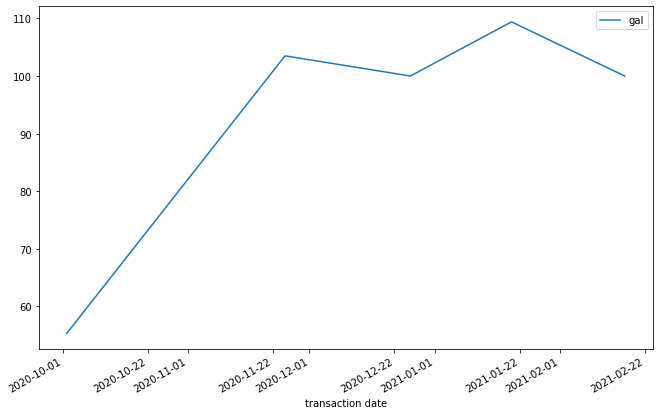

In [18]:


df.plot('transaction date', 'gal', figsize = (11,7));

# Weather Station Data
<hr />

: ---:--- :---:
|a|b|x|
: ---:--- :---:

##  Data Dictory 

Air Temperature

TMAX	Maximum temperature
TMIN	Minimum temperature
TOBS	Temperature at the time of observation

Percipitation

DAPR	Number of days included in the multiday precipitation total (MDPR)
DASF	Number of days included in the multiday snow fall total (MDSF)
MDPR	Multiday precipitation total (use with DAPR and DWPR, if available)
MDSF	Multiday snowfall total
PRCP	Precipitation
SNOW	Snowfall
SNWD	Snow depth

Water

WESD	Water equivalent of snow on the ground
WESF	Water equivalent of snowfall

Weather Type

WT01	Fog, ice fog, or freezing fog (may include heavy fog)
WT03	Thunder
WT04	Ice pellets, sleet, snow pellets, or small hail"
WT05	Hail (may include small hail)
WT06	Glaze or rime
WT08	Smoke or haze
WT09	Blowing or drifting snow
WT10	Tornado, waterspout, or funnel cloud"
WT11	High or damaging winds
WT14	Drizzle
WT16	Rain (may include freezing rain, drizzle, and freezing drizzle)"
WT18	Snow, snow pellets, snow grains, or ice crystals




## Best version of NOAA data

We downloaded the temp data from NOAA in 3 different ways to understand which way is the most complete. 

In [111]:
print(df_.shape)
df_['STATION'].nunique()

(2604, 13)


In [112]:
# by Ulster 

print(_df.shape)
_df['STATION'].nunique()

(2604, 26)


16

In [114]:
print(_df_.shape)
_df_['STATION'].nunique()

(553, 20)


13

    The last version is the most complete 
    _df

In [20]:
# the data  

_df.sample(3).T

,589,1990,1841
STATION,US1NYUL0032,US1NYUL0028,USC00306570
NAME,"ESOPUS 0.8 NNE, NY US","KERHONKSON 3.7 N, NY US","PHONECIA 2 SW, NY US"
LATITUDE,41.8385,41.8321,42.0674
LONGITUDE,-73.9588,-74.3012,-74.3356
ELEVATION,49.4,273.1,323.1
DATE,2020-09-04,2020-09-15,2020-09-19
DAPR,NaN,NaN,NaN
DAPR_ATTRIBUTES,NaN,NaN,NaN
MDPR,NaN,NaN,NaN
MDPR_ATTRIBUTES,NaN,NaN,NaN


? what are the attributes columns?


In [23]:
# how many observations centers are being used 

_df['STATION'].nunique()

16

In [24]:
# names of stations

np.unique(_df['STATION'])

array(['US1NYUL0015', 'US1NYUL0016', 'US1NYUL0019', 'US1NYUL0020',
       'US1NYUL0021', 'US1NYUL0022', 'US1NYUL0023', 'US1NYUL0026',
       'US1NYUL0028', 'US1NYUL0029', 'US1NYUL0031', 'US1NYUL0032',
       'US1NYUL0034', 'USC00305426', 'USC00306570', 'USC00307274'],
      dtype=object)

In [33]:
# list of stations and count of data they have

_df.groupby(['STATION','NAME'])['TOBS'].agg(['count', 'mean'])

,,count,mean
STATION,NAME,,
US1NYUL0015,"STONE RIDGE 0.7 N, NY US",0,NaN
US1NYUL0016,"ROSENDALE VILLAGE 1.8 WNW, NY US",0,NaN
US1NYUL0019,"WOODSTOCK 0.8 ENE, NY US",0,NaN
US1NYUL0020,"ULSTER PARK 0.9 NNW, NY US",0,NaN
US1NYUL0021,"STONE RIDGE 0.5 WNW, NY US",0,NaN
US1NYUL0022,"KINGSTON 2.1 N, NY US",0,NaN
US1NYUL0023,"WEST HURLEY 0.1 S, NY US",0,NaN
US1NYUL0026,"GARDINER 1.3 WNW, NY US",0,NaN
US1NYUL0028,"KERHONKSON 3.7 N, NY US",0,NaN


Only one station, #USC00305426 in Mohonk Lake, NY has a record of temperature.   

In [39]:
# inspect the info from #USC00305426 in Mohonk Lake, NY

_df[_df['STATION'] == 'USC00305426']['DATE']

0     2020-08-01
1     2020-08-02
2     2020-08-03
3     2020-08-04
4     2020-08-05
5     2020-08-06
6     2020-08-07
7     2020-08-08
8     2020-08-09
9     2020-08-10
10    2020-08-11
11    2020-08-12
12    2020-08-13
13    2020-08-14
14    2020-08-15
15    2020-08-16
16    2020-08-17
17    2020-08-18
18    2020-08-19
19    2020-08-20
20    2020-08-21
21    2020-08-22
22    2020-08-23
23    2020-08-24
24    2020-08-25
25    2020-08-26
26    2020-08-27
27    2020-08-28
28    2020-08-29
29    2020-08-30
30    2020-08-31
Name: DATE, dtype: object

     Temp Recordings for Mohonk Lake station where only done in Aug, not in the other months



## _df_